In [ ]:
'''Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату 
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
Произвести расчет как с использованием intercept, так и без.'''

In [53]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

X = zp.reshape(10, 1)
Y = ks.reshape(10, 1)



x_x = np.hstack([np.ones((10, 1)), X])
print(x_x) #Матричный метод расчета коэффициентов линейной регрессии

b = np.dot(np.linalg.inv(np.dot(x_x.T, x_x)), x_x.T @ Y)
print(b) #Так же выводим коэффициенты

B1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp **2) - np.mean(zp) ** 2)
print(f"B1: {B1}") #Выводим коэффициент

B0 = np.mean(ks) - B1 * np.mean(zp)
print(f"B0: {B0}") #Выводим интерцепт

def mse_(B1, y = ks, x = zp, n = 10):
    return np.sum((B1*x - y)**2) / n

mse = mse_(B1, y = ks, x = zp, n = 10)
alpha = 1e-6
B1 = 0.1
n = 10
for i in range(3000):
    B1 -= alpha * (2/n) * np.sum((B1 * zp - ks) * zp) 
    if i % 500 == 0:
        print ('Iteration = {i}, B1 = {B1}, mse = {mse}'.format(i = i, B1 = B1, mse = mse_(B1)))
    
print()

def mse_1(B1, B0, y = ks, x = zp, n = 10):
    return np.sum((B0 + B1*x - y)**2)/n
B0 = 0.1
B1 = 0.1
for i in range (3000):
    B1 -= alpha * (2/n) * np.sum ((B0 + B1 * zp - ks) * zp)
    B0 -= alpha * (2/n) * np.sum ((B0 + B1 * zp - ks) * zp)
    if i % 500 == 0:
        print ('Iteration = {i}, B1 = {B1}, B0 = {B0}, mse = {mse}'.format(i = i, B1 = B1, B0 = B0, mse = mse_1(B1, B0)))





[[  1.  35.]
 [  1.  45.]
 [  1. 190.]
 [  1. 200.]
 [  1.  40.]
 [  1.  70.]
 [  1.  54.]
 [  1. 150.]
 [  1. 120.]
 [  1. 110.]]
[[444.17735732]
 [  2.62053888]]
B1: 2.620538882402765
B0: 444.1773573243596
Iteration = 0, B1 = 0.25952808, mse = 493237.7212546963
Iteration = 500, B1 = 5.889815595583751, mse = 56516.858416040064
Iteration = 1000, B1 = 5.8898204201285544, mse = 56516.85841571941
Iteration = 1500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2500, B1 = 5.889820420132673, mse = 56516.85841571943

Iteration = 0, B1 = 0.2595078, B0 = 0.25511284968504, mse = 492892.14933292643
Iteration = 500, B1 = 5.847939119406923, B0 = 5.689565003262093, mse = 55242.958121947435
Iteration = 1000, B1 = 5.847943446276081, B0 = 5.68956921091216, mse = 55242.95718566068
Iteration = 1500, B1 = 5.847943446279413, B0 = 5.6895692109154, mse = 55242.95718565994
Iteration = 2000, B1 = 5.847943446279413, B0 = 5.689569210

In [54]:
x = sm.add_constant(X)
print(f'x {x}')
model = sm.OLS(Y, x)
result = model.fit()
print(result.summary())

x [[  1.  35.]
 [  1.  45.]
 [  1. 190.]
 [  1. 200.]
 [  1.  40.]
 [  1.  70.]
 [  1.  54.]
 [  1. 150.]
 [  1. 120.]
 [  1. 110.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     29.67
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           0.000611
Time:                        18:54:43   Log-Likelihood:                -58.064
No. Observations:                  10   AIC:                             120.1
Df Residuals:                       8   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975

c:\Users\Сергей\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


R-squared: 0.7876386635293686
intercept: [444.17735732]
coef: [2.62053888]


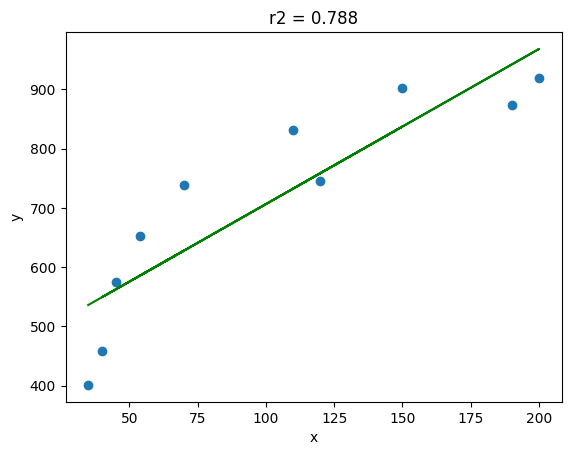

In [56]:
model = LinearRegression()
# x = zp.reshape(-1, 1)
model.fit(X, Y)
r_sq = model.score(X, Y) #Коэффициент детерминации
print(f"R-squared: {r_sq}") # На 78.8 % зарплата влияет на значения крединого скоринга 



const = model.intercept_ #Подбираем коэффициенты
beta = model.coef_[0]
print(f"intercept: {const}") #Выводим интерцепт
print(f"coef: {beta}") #Выводим коэффициент

plt.scatter(X, Y)
plt.plot(X, beta * X + const, 'g' )
plt.title(f"r2 = {round(r_sq, 3)}")
plt.xlabel('x')
plt.ylabel('y')
plt.show()